<a href="https://colab.research.google.com/github/leenasilvoster/Mytest/blob/master/Simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,random_state=42)

In [ ]:
ML = keras.Sequential()
xtrain.shape[1:]

(4,)

In [ ]:
ML.add(keras.layers.Dense(units=5,activation='relu',input_shape=(xtrain.shape[1:])))
ML.add(keras.layers.Dense(units=1,activation = 'sigmoid'))
ML.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#COMPILE
#ML.compile(loss='sparse_categorical_crossentropy',optimizer= 'adam',metrics = ['sparse_categorical_accuracy'])
ML.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
#ML.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#ML.fit(xtrain,ytrain,epochs = 50)
seqModel = ML.fit(xtrain, ytrain,validation_split = 0.1, epochs=50, batch_size=4)
print(seqModel.history)
epochs          = 50

Epoch 1/50
24/24 [==============================] - 13s 19ms/step - loss: 0.0000e+00 - accuracy: 0.2457 - val_loss: 0.0000e+00 - val_accuracy: 0.1818
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3323 - val_loss: 0.0000e+00 - val_accuracy: 0.1818
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3309 - val_loss: 0.0000e+00 - val_accuracy: 0.1818
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2964 - val_loss: 0.0000e+00 - val_accuracy: 0.1818
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2955 - val_loss: 0.0000e+00 - val_accuracy: 0.1818
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3070 - val_loss: 0.0000e+00 - val_accuracy: 0.1818
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3887 - val_lo

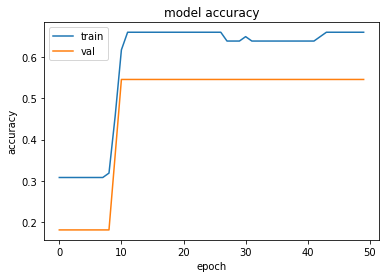

In [ ]:
plt.plot(seqModel.history['accuracy'])
plt.plot(seqModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

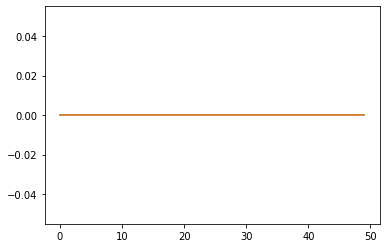

In [ ]:
# visualizing losses and accuracy
train_loss = seqModel.history['loss']
val_loss   = seqModel.history['val_loss']
train_acc  = seqModel.history['accuracy']
val_acc    = seqModel.history['val_accuracy']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)

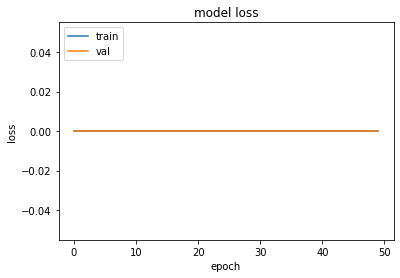

In [ ]:
plt.plot(seqModel.history['loss'])
plt.plot(seqModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

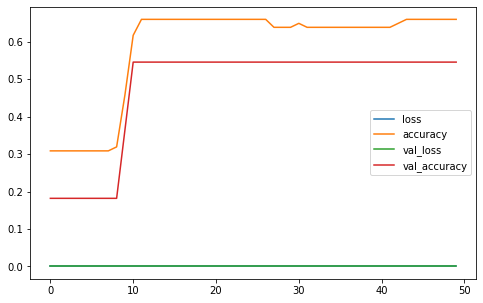

In [ ]:
import pandas as pd
pd.DataFrame(seqModel.history).plot(figsize=(8,5))
plt.show()

In [ ]:
test_loss,test_accuracy =ML.evaluate(xtest,ytest)

2/2 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.7111


In [ ]:
print("Accuracy:%.2f" %test_accuracy*100)

Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.71Accuracy:0.7

In [ ]:
import numpy as np
#Saving:
np.save('my_history.npy',seqModel.history)
#Loading:
history=np.load('my_history.npy',allow_pickle='TRUE').item()

In [ ]:
from sklearn.metrics import classification_report

y_pred = ML.predict(xtest, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(ytest, y_pred_bool))

1/1 [==============================] - 0s 286ms/step
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        19
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        13

    accuracy                           0.42        45
   macro avg       0.14      0.33      0.20        45
weighted avg       0.18      0.42      0.25        45



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

Y_pred = model.predict_generator(validation_generator, nb_validation_samples // 
batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

In [ ]:
import sklearn.metrics as metrics

y_pred_ohe = ML.predict(xtest, batch_size=64, verbose=1)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

confusion_matrix = metrics.confusion_matrix(y_true=ytest, y_pred=y_pred_labels)  # shape=(12, 12)

1/1 [==============================] - 0s 15ms/step


In [ ]:
print(confusion_matrix)

[[19  0  0]
 [13  0  0]
 [13  0  0]]
